In [ ]:
import pandas as pd
import numpy as np

# 모델링 및 평가 라이브러리
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.font_manager as fm
from sklearn.model_selection import GridSearchCV


# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

print("Korean font installed and configured.")

Korean font installed and configured.


In [ ]:
# 데이터 불러오기
df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_1.csv')
display(df_7.shape, df_1.shape)

/tmp/ipython-input-2606453542.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')


(221701, 39)

(32709, 39)

In [ ]:
# --- 1. Feature Selection ---
df_7.drop(columns=['Unnamed: 0', '구분', '옵션코드', '규격', '상품명', 'holiday_name'], inplace=True)
df_7.dtypes

,0
판매일,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
입수,int64
바코드,float64
대분류,int64
중분류,int64
소분류,int64
공급가액,int64


In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib'

# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
model = joblib.load(filename)

print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 7
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_7.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_7[df_7['판매일'] < '2024-01-01']
val_df = df_7[df_7['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 최적 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

'/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib' 파일에서 모델을 불러왔습니다.
훈련 데이터 개수: 193781개, 검증 데이터 개수: 27920개

--- 튜닝된 최적 모델 최종 성능 ---
RMSE: 6.6793
MAE: 1.3277
R-squared: 0.8656
Adjusted R-squared: 0.8655


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

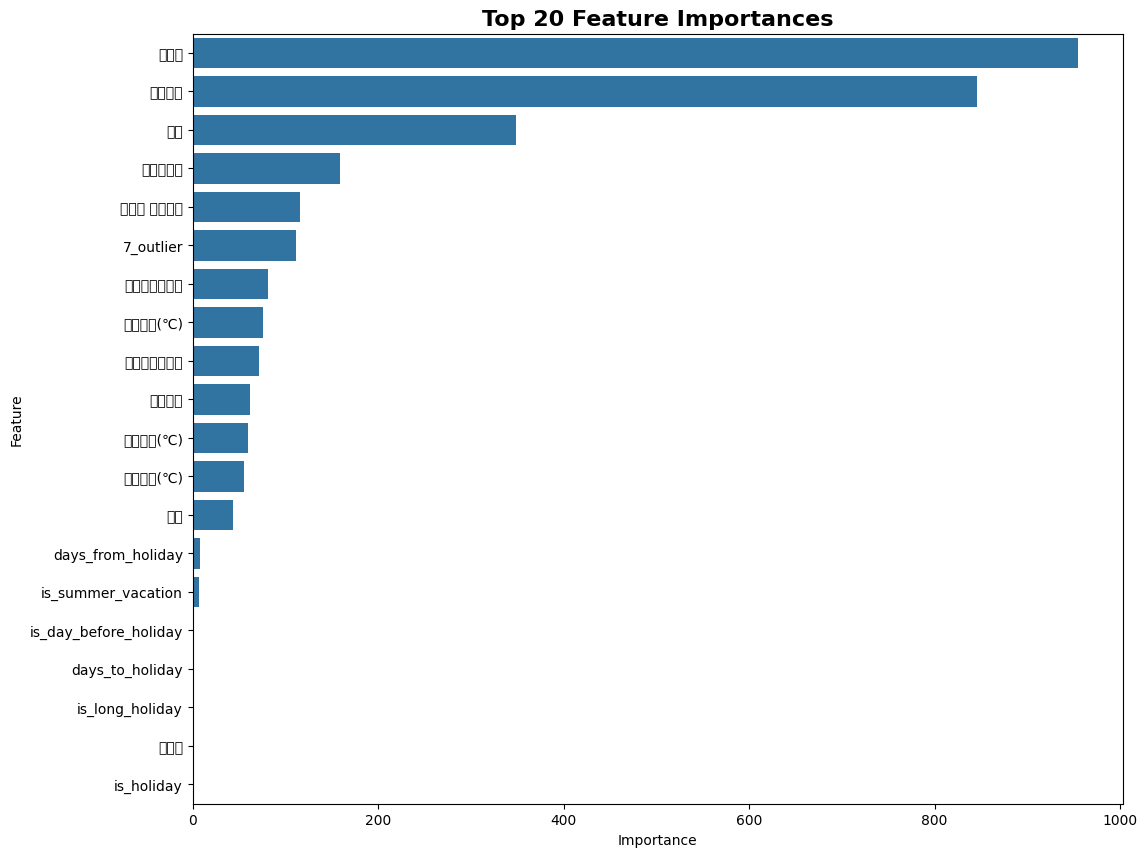


--- 상위 20개 변수 중요도 ---


,Feature,Importance
3,바코드,955
6,공급가액,846
2,입수,349
0,매출처코드,159
1,매출처 우편번호,116
22,7_outlier,111
29,소비자심리지수,81
25,최저기온(℃),76
28,소비자물가지수,71
27,국제유가,62


In [ ]:
# 1. ✨️ feature_importances_ 속성으로 변수 중요도 추출
importances = model.feature_importances_

# 2. 변수 이름과 중요도를 짝지어 데이터프레임 생성
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': importances}
)

# 3. 중요도 순으로 정렬하고 상위 20개 선택
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# 4. 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Feature Importances', fontsize=16, fontweight='bold')
plt.show()

print("\n--- 상위 20개 변수 중요도 ---")
display(top_20_features)